In [1]:
from aepsych.server import AEPsychServer

import matplotlib.pyplot as plt
import numpy as np

db_name = "unity_example_db.db"



## Loading the db

In [2]:
serv = AEPsychServer(database_path=db_name)



2022-07-12 16:36:03,717 [INFO   ] Found DB at unity_example_db.db, appending!


The database is made of a set of experiments, which have unique experiment UUIDs. Every time the server is started (e.g. from the command line), a new experiment id is generated. For a list of all experiment ids:

In [3]:
exp_ids = [rec.experiment_id for rec in serv.db.get_master_records()]
print(exp_ids)


['d996ea94-36a3-4fdf-9dc8-b91e68045ba8', 'ad906f97-d12c-49f7-84d4-e36940b4f551']


The above indicates that there are two experiment_ids in this database. 

Note that the above commands do not actually load any of the experiment data from the database. The data is only loaded when you run `serv.replay` to replay all of the messages that are recorded in the database. 

Note that replay can take a while, since every message sent to the server is getting replayed, and all calculations are being redone. You can pass `skip_computations = True` to make this much faster and skip all the model computations. 

In [4]:
serv.replay(exp_ids[0], skip_computations=True)

2022-07-12 16:36:03,857 [INFO   ] skip_computations=True, make sure to refit the final strat before doing anything!
2022-07-12 16:36:03,899 [INFO   ] Received msg [setup]
2022-07-12 16:36:03,906 [INFO   ] Request type is ask or query and skip_computations==True, skipping!
2022-07-12 16:36:03,914 [INFO   ] Received msg [tell]
2022-07-12 16:36:03,917 [INFO   ] Request type is ask or query and skip_computations==True, skipping!
2022-07-12 16:36:03,918 [INFO   ] Received msg [tell]
2022-07-12 16:36:03,920 [INFO   ] Request type is ask or query and skip_computations==True, skipping!
2022-07-12 16:36:03,922 [INFO   ] Received msg [tell]
2022-07-12 16:36:03,924 [INFO   ] Request type is ask or query and skip_computations==True, skipping!
2022-07-12 16:36:03,926 [INFO   ] Received msg [tell]
2022-07-12 16:36:03,928 [INFO   ] Request type is ask or query and skip_computations==True, skipping!
2022-07-12 16:36:03,930 [INFO   ] Received msg [tell]
2022-07-12 16:36:03,932 [INFO   ] Request type is

After replaying, the experiment data will be contained in strategies. Each strategy corresponds to a run of an experiment; a new strategy is created every time a new setup message was sent. The local server has a list of those strategies, stored in `serv._strats.` 

In [5]:
serv._strats

You can load any of the exp_ids you want to this intance of the server; each time you replay, those strategies will be appended to the server. When developing, often I will just want to load just the last one:

In [6]:
serv.replay(exp_ids[-1], skip_computations=True)

2022-07-12 16:36:08,504 [INFO   ] skip_computations=True, make sure to refit the final strat before doing anything!
2022-07-12 16:36:08,534 [INFO   ] Received msg [setup]
2022-07-12 16:36:08,536 [INFO   ] Request type is ask or query and skip_computations==True, skipping!
2022-07-12 16:36:08,538 [INFO   ] Received msg [tell]
2022-07-12 16:36:08,540 [INFO   ] Request type is ask or query and skip_computations==True, skipping!
2022-07-12 16:36:08,554 [INFO   ] Received msg [setup]
2022-07-12 16:36:08,556 [INFO   ] Request type is ask or query and skip_computations==True, skipping!
2022-07-12 16:36:08,568 [INFO   ] Received msg [tell]
2022-07-12 16:36:08,569 [INFO   ] Request type is ask or query and skip_computations==True, skipping!
2022-07-12 16:36:08,571 [INFO   ] Received msg [tell]
2022-07-12 16:36:08,573 [INFO   ] Request type is ask or query and skip_computations==True, skipping!
2022-07-12 16:36:08,574 [INFO   ] Received msg [tell]
2022-07-12 16:36:08,576 [INFO   ] Request type i

In [7]:
serv._strats

## Viewing the data

To start, we should make sure to run a fit for every model. Note that this only works if the strategy had gotten past the initialization trials, so if we are looping through strategies, we should filter those out.


In [8]:
for idx, strat in enumerate(serv._strats):
    print('strat index:', idx)
    if not strat.has_model:
        print('   strat skipped!')
        continue
    strat.model.fit(strat.x, strat.y)



2022-07-12 16:36:10,940 [INFO   ] Starting fit...


strat index: 0


2022-07-12 16:36:12,501 [INFO   ] Fit done, time=1.5601451396942139
2022-07-12 16:36:12,508 [INFO   ] Starting fit...


strat index: 1


2022-07-12 16:36:12,943 [INFO   ] Fit done, time=0.41870903968811035
2022-07-12 16:36:12,948 [INFO   ] Starting fit...


strat index: 2


2022-07-12 16:36:13,799 [INFO   ] Fit done, time=0.8499481678009033


strat index: 3
strat index: 4
strat index: 5
strat index: 6


### Plotting

We currently have a plotting function (for 1D or 2D) which shows the underlying model along with the points sampled. 


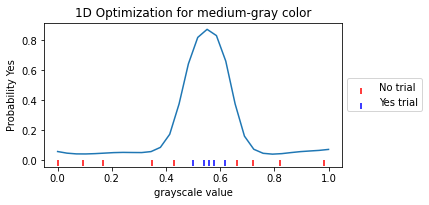

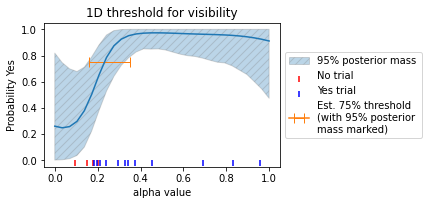

In [9]:
from aepsych.plotting import plot_strat

strat = serv._strats[0]
plot_strat(strat, xlabel='grayscale value', ylabel='Probability Yes', title='1D Optimization for medium-gray color', cred_level=None, target_level=None)

strat = serv._strats[4]
plot_strat(strat, xlabel='alpha value', ylabel='Probability Yes', title='1D threshold for visibility')


2022-07-12 16:36:21,017 [INFO   ] Starting fit...
2022-07-12 16:36:21,529 [INFO   ] Fit done, time=0.5041711330413818


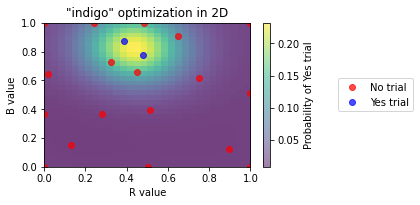

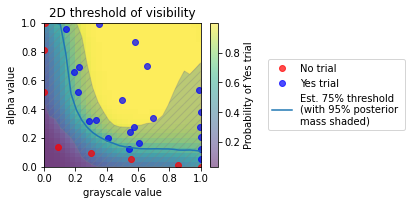

In [10]:

strat = serv._strats[1]
plot_strat(strat, xlabel='R value', ylabel='B value', title='"indigo" optimization in 2D', target_level=None)

strat = serv._strats[5]
plot_strat(strat, xlabel='grayscale value', ylabel='alpha value', title='2D threshold of visibility')



We also have a 3D plotting function. See aepsych.plotting._plot_strat_3d for more details.

2022-07-12 16:36:23,989 [INFO   ] Starting fitting (no warm start)...
2022-07-12 16:36:24,058 [INFO   ] Fitting done, took 0.06900572776794434


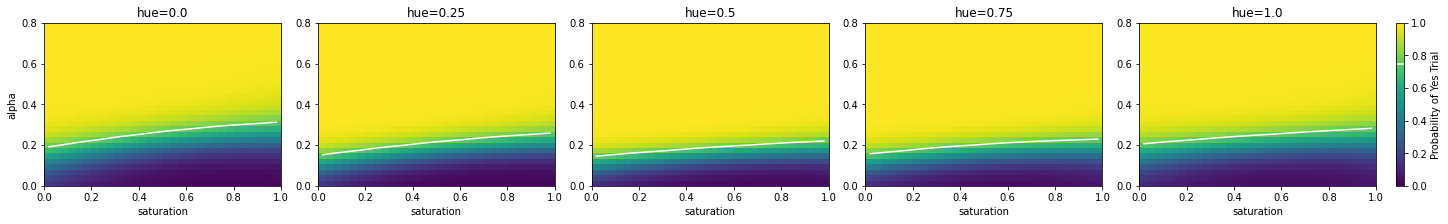

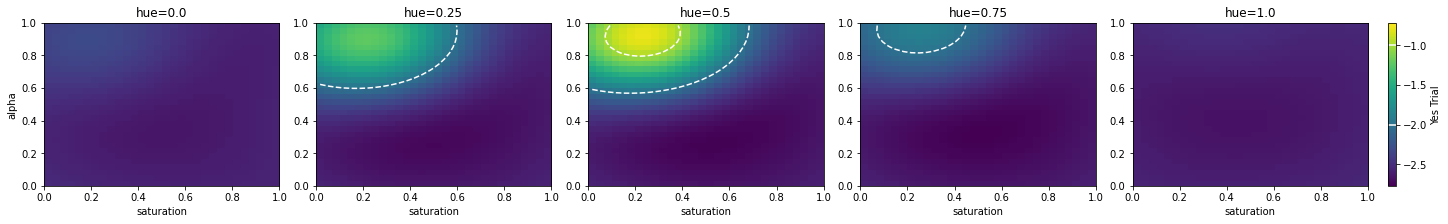

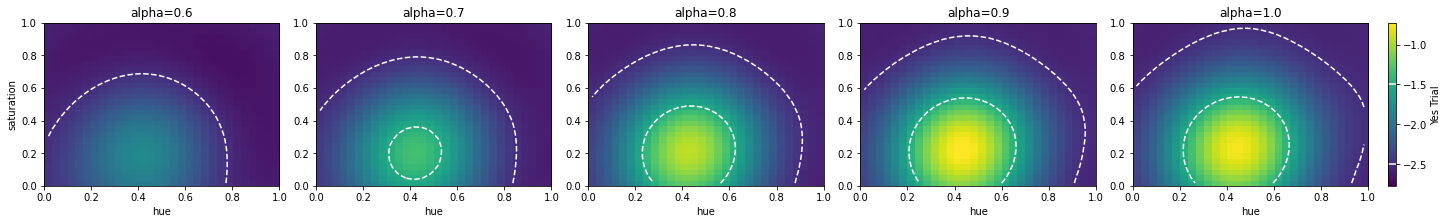

In [11]:
from aepsych.plotting import plot_strat_3d

plot_strat_3d(serv._strats[6], parnames = serv.parnames, probability_space=True)

plot_strat_3d(serv._strats[2], parnames = serv.parnames)

#Optionally, define the exact values on which it is sliced, plot specific contour levels, etc
plot_strat_3d(serv._strats[2], parnames = serv.parnames, slice_dim = 2, slice_vals = [0.6, 0.7, 0.8, 0.9, 1.0], contour_levels=[-2.5, -1.5])




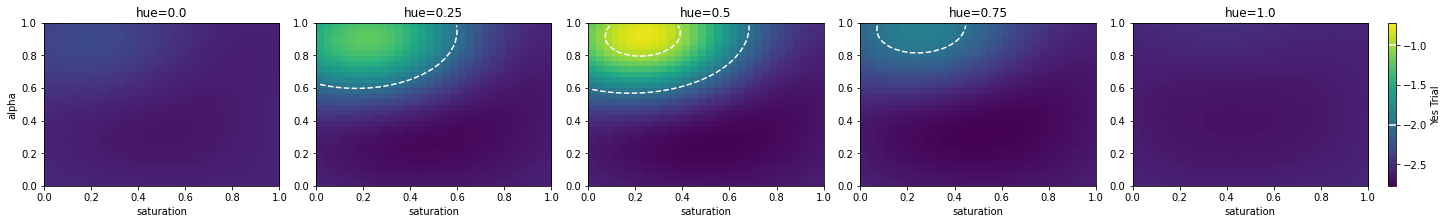

In [12]:
plot_strat_3d(serv._strats[2], parnames = serv.parnames, contour_levels=True)


## Advanced strategy exploration

### Viewing strategy information

In [13]:
strat = serv._strats[-1]

print('strat num of dimensions:', strat.dim)
print('type of experiment:',strat.outcome_type)
print('strategy: ', strat)
print('acqf:', strat.generator.acqf)


strat num of dimensions: 3
type of experiment: single_probit
strategy:  <aepsych.strategy.SequentialStrategy object at 0x7f7f10667220>
acqf: <class 'aepsych.acquisition.monotonic_rejection.MonotonicMCLSE'>


The base strategy is typically a sequential strategy, containging two or more sub-strategies. Usually, the first sub-strategy generations pseudo-random Sobol points, and the second is something else. Here we show the types and total number of trials for each sub-strategy within the sequential strategy.



In [14]:

print([ [sub_strat.generator, sub_strat.n_trials] for sub_strat in strat.strat_list ])

[[<aepsych.generators.sobol_generator.SobolGenerator object at 0x7f7f106678e0>, 10], [<aepsych.generators.monotonic_rejection_generator.MonotonicRejectionGenerator object at 0x7f7f10bb6730>, 25]]


To show the upper/lower extents of each dimension:


In [15]:
print(np.c_[strat.lb, strat.ub])

[[0.  1. ]
 [0.  1. ]
 [0.  0.8]]


### Accessing and amending trial data 

To see the trial data for a strategy, you can use `strat.x` and `strat.y`

In [16]:
print(strat.x[0:3]) #the paramters in the first three trials

print(strat.y) #the responses of all trials

tensor([[0.1549, 0.4143, 0.4542],
        [0.5631, 0.7462, 0.0724],
        [0.7774, 0.1117, 0.6363]])
tensor([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
        1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.])


In [17]:
strat.x.shape

torch.Size([34, 3])

The shape of the x data is a quick way to see the configuration: above, size [34, 3] indicates we had 34 trials, in 3 dimensions.


You can add data by using `strat.add_data`: for example, here we create a dummy point and add it. 


In [18]:
import torch 

last_x, last_y = strat.x[-1], strat.y[-1]
new_x = torch.Tensor([1.0, 1.0, 1.0])
new_y = torch.Tensor([0.0])
serv.strat.add_data(new_x, new_y)

In [19]:
strat.x.shape


torch.Size([35, 3])

### Using the model

To directly query the model, we must create a set of points to sample, then call `strat.predict` on those points:

In [20]:
#Here we sample strategy 2, a 3D optimization. 

strat = serv._strats[2] 

# Create a grid on which to sample the model, then sample it.
# Note that for >2 dimensions, gridsize should be smaller than the default of 30, as it will create [gridsize^dim] points.
xgrid = strat.model.dim_grid(gridsize=10)
fmean = strat.predict(xgrid)[0].detach().numpy()


2022-07-12 16:36:31,913 [INFO   ] Starting fitting (warm start)...
2022-07-12 16:36:31,925 [INFO   ] Starting fit...
2022-07-12 16:36:31,955 [INFO   ] Fit done, time=0.02832770347595215
2022-07-12 16:36:31,956 [INFO   ] Fitting done, took 0.04256296157836914


In [21]:
vmin = np.min(fmean); vmax = np.max(fmean)

print("model min and max: ", vmin, vmax)

model min and max:  -2.769110938190888 -0.7233469705839817


Now, we can do whatever we want with analysis or custom plots, etc. Here is a custom function to plot some 2D slices of the 3D strategy:


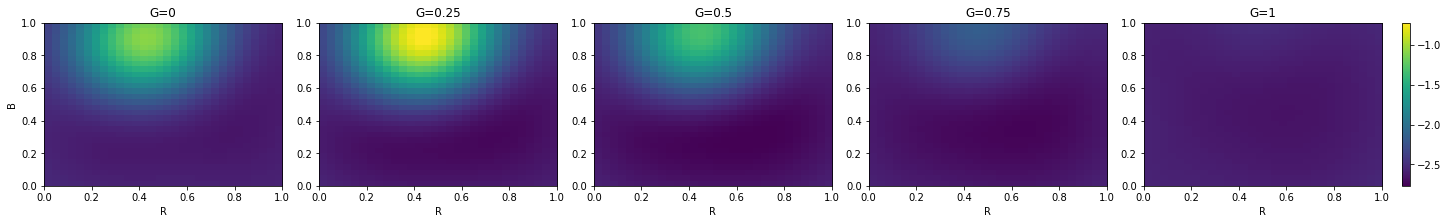

In [22]:
from scipy.stats import norm
parnames = ["R", "G", "B"] 


def plot_slices_at(strat, parnames, dim_num, dim_vals, gridsize=30, lse=False):
    # Get the overall model min and max so that all slices are set to that scale
    xgrid = strat.model.dim_grid(gridsize=10)
    fmean = strat.model.predict(xgrid)[0].detach().numpy()
    vmin = np.min(fmean); vmax = np.max(fmean)

    #Set up the plots and extents 
    extent = np.c_[strat.lb, strat.ub].reshape(-1)
    fig, axs = plt.subplots(1,len(dim_vals), constrained_layout=True, figsize=(20,3))
    gridsizes=[gridsize, gridsize, gridsize]
    gridsizes[dim_num] = 1
    
    #For each slice value, we will create one plot
    for _i, dim_val in enumerate(dim_vals):
        extent[dim_num*2] = dim_val
        x = torch.Tensor(
        np.mgrid[
            extent[0] : extent[1] : gridsizes[0] * 1j,
            extent[2] : extent[3] : gridsizes[1] * 1j,
            extent[4] : extent[5] : gridsizes[2] * 1j,
        ]
        .reshape(3, -1)
        .T
        )
        
        fmean, fvar = strat.predict(x)
        fmean = fmean.detach().numpy().reshape(gridsize,gridsize)
        plt_extents = np.delete(extent, [dim_num*2, dim_num*2+1])
        plt_parnames = np.delete(parnames, dim_num)
        
        #If LSE, then the scale is just 0 to 1 and we take the probability
        if lse:
            vmin=0.0
            vmax=1.0
            fmean = norm.cdf(fmean)
    
        #Create the subplot
        img = axs[_i].imshow(fmean.T, extent=plt_extents, origin="lower", aspect="auto", vmin=vmin, vmax=vmax)
        axs[_i].set_title(parnames[dim_num]+'='+str(dim_val))
        axs[_i].set_xlabel(plt_parnames[0])
        
        #only show y-axis label on first plot
        if _i==0:
            axs[_i].set_ylabel(plt_parnames[1])

    #show colorbar beside last plot
    plt.colorbar(img, ax=axs[_i])
    plt.show()

    
plot_slices_at(strat, parnames, 1, [0, 0.25, 0.5, 0.75, 1])


You can  also use query functions to get more information about the model. For example, to get the location of the maximum of the above strategy:

In [23]:
strat.get_max()

(tensor(-0.6929), tensor([0.4334, 0.2182, 0.9335]))

The above prints out the maximum value and its location, in this case an array of the 3 parameter values. 

Similarly for the minimum:

In [24]:
strat.get_min()

(tensor(-2.7730), tensor([0.6688, 0.5395, 0.2896]))

For fun, here is the color corresponding to the maximum of the model shown above, which is one person's (R,G,B) color corresponding to the color "indigo."

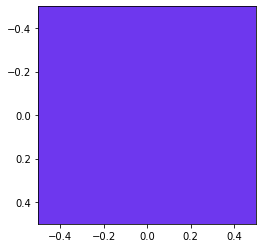

In [25]:
import matplotlib.pyplot as plt
plt.imshow([[strat.get_max()[1].numpy()]])
plt.show()
